<a href="https://colab.research.google.com/github/amitmldlai/Donor-Choose-Dataset---Naive-Bayes/blob/main/Donor_Choose_Dataset_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from scipy.sparse import hstack
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix 
import math
from tqdm import tqdm
from prettytable import PrettyTable
import warnings
warnings.filterwarnings('ignore')

#Load data

In [4]:
data = pd.read_csv('preprocessed_data.csv')
data.columns.tolist()

['school_state',
 'teacher_prefix',
 'project_grade_category',
 'teacher_number_of_previously_posted_projects',
 'project_is_approved',
 'clean_categories',
 'clean_subcategories',
 'essay',
 'price']

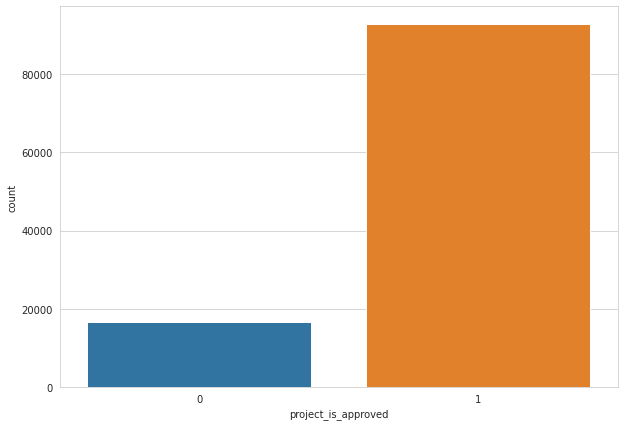

In [24]:
plt.figure(figsize=(10, 7))
sns.countplot(data['project_is_approved'])
plt.show()



*   Dataset is imbalanced



#Splitting data

In [33]:
x_train, x_test, y_train, y_test = train_test_split(data, data['project_is_approved'], test_size=0.2, random_state=42, stratify=data['project_is_approved'])

In [34]:
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)

x_train:  (87398, 9)
y_train:  (87398,)


In [35]:
print("x_test: ", x_test.shape)
print("y_test: ", y_test.shape)

x_test:  (21850, 9)
y_test:  (21850,)


**X_TRAIN**

In [36]:
x_train_y_value_counts = x_train['project_is_approved'].value_counts()
print("Number of projects that are approved for funding    ", x_train_y_value_counts[1]," -> ",round(x_train_y_value_counts[1]/(x_train_y_value_counts[1]+x_train_y_value_counts[0])*100,2),"%")
print("Number of projects that are not approved for funding ",x_train_y_value_counts[0]," -> ",round(x_train_y_value_counts[0]/(x_train_y_value_counts[1]+x_train_y_value_counts[0])*100,2),"%")

Number of projects that are approved for funding     74164  ->  84.86 %
Number of projects that are not approved for funding  13234  ->  15.14 %


**X_TEST**

In [37]:
x_test_y_value_counts = x_test['project_is_approved'].value_counts()
print("Number of projects that are approved for funding    ", x_test_y_value_counts[1]," -> ",round(x_test_y_value_counts[1]/(x_test_y_value_counts[1]+x_test_y_value_counts[0])*100,2),"%")
print("Number of projects that are not approved for funding ",x_test_y_value_counts[0]," -> ",round(x_test_y_value_counts[0]/(x_test_y_value_counts[1]+x_test_y_value_counts[0])*100,2),"%")

Number of projects that are approved for funding     18542  ->  84.86 %
Number of projects that are not approved for funding  3308  ->  15.14 %


#Feature Engineering

**CountVectorizer of text data**

Essay

In [38]:
vectorizer_essay_bow = CountVectorizer(min_df=10)
vectorizer_essay_bow.fit(x_train['essay'])
fea_vectorizer_essay_bow = list(vectorizer_essay_bow.get_feature_names_out())
x_train_essay_bow = vectorizer_essay_bow.transform(x_train['essay'])
x_test_essay_bow  = vectorizer_essay_bow.transform(x_test['essay'])

print("Shape of matrix after BOW -> Essay: x_train: ",x_train_essay_bow.shape)
print("Shape of matrix after BOW -> Essay: x_test : ",x_test_essay_bow.shape)

Shape of matrix after BOW -> Essay: x_train:  (87398, 15215)
Shape of matrix after BOW -> Essay: x_test :  (21850, 15215)


**TfidfVectorizer of text data**

In [40]:
vectorizer_essay_tfidf = TfidfVectorizer(min_df=10)
vectorizer_essay_tfidf.fit(x_train['essay'])
fea_vectorizer_essay_tfidf = list(vectorizer_essay_tfidf.get_feature_names_out())
x_train_essay_tfidf = vectorizer_essay_tfidf.transform(x_train['essay'])
x_test_essay_tfidf  = vectorizer_essay_tfidf.transform(x_test['essay'])

print("Shape of matrix after TF-IDF -> Essay: x_train: ",x_train_essay_tfidf.shape)
print("Shape of matrix after TF-IDF -> Essay: x_test : ",x_test_essay_tfidf.shape)

Shape of matrix after TF-IDF -> Essay: x_train:  (87398, 15215)
Shape of matrix after TF-IDF -> Essay: x_test :  (21850, 15215)


**One-Hot encoding of categorical features**

Clean Categories

In [44]:
vectorizer_sub = CountVectorizer(binary = True)
vectorizer_sub.fit(x_train['clean_categories'])
fea_vectorizer_sub = list(vectorizer_sub.get_feature_names_out())
x_train_categories_one_hot = vectorizer_sub.transform(x_train['clean_categories'])
x_test_categories_one_hot  = vectorizer_sub.transform(x_test['clean_categories'])

print("Shape of matrix after one hot encoding -> categories: x_train: ",x_train_categories_one_hot.shape)
print("Shape of matrix after one hot encoding -> categories: x_test : ",x_test_categories_one_hot.shape)

Shape of matrix after one hot encoding -> categories: x_train:  (87398, 9)
Shape of matrix after one hot encoding -> categories: x_test :  (21850, 9)


Clean Subcategories

In [43]:
vectorizer_sub_sub = CountVectorizer(binary = True)
vectorizer_sub_sub.fit(x_train['clean_subcategories'])
fea_vectorizer_sub_sub = list(vectorizer_sub_sub.get_feature_names_out())
x_train_sub_categories_one_hot = vectorizer_sub_sub.transform(x_train['clean_subcategories'])
x_test_sub_categories_one_hot  = vectorizer_sub_sub.transform(x_test['clean_subcategories'])

print("Shape of matrix after one hot encoding -> sub_categories: x_train: ",x_train_sub_categories_one_hot.shape)
print("Shape of matrix after one hot encoding -> sub_categories: x_test : ",x_test_sub_categories_one_hot.shape)

Shape of matrix after one hot encoding -> sub_categories: x_train:  (87398, 30)
Shape of matrix after one hot encoding -> sub_categories: x_test :  (21850, 30)


School State

In [45]:
vectorizer_state = CountVectorizer(binary = True)
vectorizer_state.fit(x_train['school_state'])
fea_vectorizer_state = list(vectorizer_state.get_feature_names_out())
x_train_school_state_one_hot = vectorizer_state.transform(x_train['school_state'])
x_test_school_state_one_hot  = vectorizer_state.transform(x_test['school_state'])

print("Shape of matrix after one hot encoding -> school_state: x_train: ",x_train_school_state_one_hot.shape)
print("Shape of matrix after one hot encoding -> school_state: x_test : ",x_test_school_state_one_hot.shape)

Shape of matrix after one hot encoding -> school_state: x_train:  (87398, 51)
Shape of matrix after one hot encoding -> school_state: x_test :  (21850, 51)


Teacher Prefix

In [46]:
vectorizer_teacher = CountVectorizer(binary=True)
vectorizer_teacher.fit(x_train['teacher_prefix'])
fea_vectorizer_teacher = list(vectorizer_teacher.get_feature_names_out())
x_train_teacher_prefix_one_hot = vectorizer_teacher.transform(x_train['teacher_prefix'])
x_test_teacher_prefix_one_hot  = vectorizer_teacher.transform(x_test['teacher_prefix'])

print("Shape of matrix after one hot encoding -> teacher_prefix: x_train: ",x_train_teacher_prefix_one_hot.shape)
print("Shape of matrix after one hot encoding -> teacher_prefix: x_test : ",x_train_teacher_prefix_one_hot.shape)

Shape of matrix after one hot encoding -> teacher_prefix: x_train:  (87398, 5)
Shape of matrix after one hot encoding -> teacher_prefix: x_test :  (87398, 5)


Project Grade Category

In [47]:
vectorizer_grade = CountVectorizer(binary=True)
vectorizer_grade.fit(x_train['project_grade_category'].values)
fea_vectorizer_grade = list(vectorizer_grade.get_feature_names_out())
x_train_grade_category_one_hot = vectorizer_grade.transform(x_train['project_grade_category'])
x_test_grade_category_one_hot  = vectorizer_grade.transform(x_test['project_grade_category'])

print("Shape of matrix after one hot encoding -> project_grade: x_train : ",x_train_grade_category_one_hot.shape)
print("Shape of matrix after one hot encoding -> project_grade: x_test  : ",x_test_grade_category_one_hot.shape)

Shape of matrix after one hot encoding -> project_grade: x_train :  (87398, 4)
Shape of matrix after one hot encoding -> project_grade: x_test  :  (21850, 4)


**Numerical Features**

Price

In [59]:
normalizer = Normalizer()

x_train_price_normalized = normalizer.fit_transform(x_train['price'].values.reshape(1, -1)).reshape(-1, 1)
x_test_price_normalized  = normalizer.fit_transform(x_test['price'].values.reshape(1, -1)).reshape(-1, 1)

print("Shape of matrix after normalization -> Price Normalized: x_train: ", x_train_price_normalized.shape)
print("Shape of matrix after normalization -> Price Normalized: x_test : ", x_test_price_normalized.shape)

Shape of matrix after normalization -> Price Normalized: x_train:  (87398, 1)
Shape of matrix after normalization -> Price Normalized: x_test :  (21850, 1)


Teacher number of previously posted projects

In [64]:
normalizer = Normalizer()

x_train_teacher_number_of_previously_posted_projects_normalized = normalizer.fit_transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).reshape(-1, 1)
x_test_teacher_number_of_previously_posted_projects_normalized  = normalizer.fit_transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(1, -1)).reshape(-1, 1)

print("Shape of matrix after normalization -> Teacher_number_of_previously_posted_projects Normalized: x_train: ",x_train_teacher_number_of_previously_posted_projects_normalized.shape)
print("Shape of matrix after normalization -> Teacher_number_of_previously_posted_projects Normalized: x_test : ",x_test_teacher_number_of_previously_posted_projects_normalized.shape)

Shape of matrix after normalization -> Teacher_number_of_previously_posted_projects Normalized: x_train:  (87398, 1)
Shape of matrix after normalization -> Teacher_number_of_previously_posted_projects Normalized: x_test :  (21850, 1)


#Training model using BOW features(for text data)

Stacking all the processed features using scipy sparse hstack, with essay as BBOW featurized

In [66]:
x_train_onehot_bow = hstack((x_train_categories_one_hot, x_train_sub_categories_one_hot, x_train_school_state_one_hot, x_train_teacher_prefix_one_hot, x_train_grade_category_one_hot, x_train_price_normalized, x_train_teacher_number_of_previously_posted_projects_normalized, x_train_essay_bow))
x_test_onehot_bow  = hstack((x_test_categories_one_hot, x_test_sub_categories_one_hot, x_test_school_state_one_hot, x_test_teacher_prefix_one_hot, x_test_grade_category_one_hot, x_test_price_normalized, x_test_teacher_number_of_previously_posted_projects_normalized, x_test_essay_bow))

print("Type -> One Hot -> x_train: ",type(x_train_onehot_bow))
print("Type -> One Hot -> x_test : ",type(x_test_onehot_bow))
print("\n")
print("Shape -> One Hot -> x_train: ",x_train_onehot_bow.shape)
print("Shape -> One Hot -> x_test : ",x_test_onehot_bow.shape)

Type -> One Hot -> x_train:  <class 'scipy.sparse.coo.coo_matrix'>
Type -> One Hot -> x_test :  <class 'scipy.sparse.coo.coo_matrix'>


Shape -> One Hot -> x_train:  (87398, 15316)
Shape -> One Hot -> x_test :  (21850, 15316)


**GridSearchCV - Train model to find best Hyperparameters**

In [69]:
mnb_bow = MultinomialNB(class_prior = [0.5, 0.5])
hyperparameter = {'alpha':[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 2500, 5000, 10000]}
clf = GridSearchCV(mnb_bow, hyperparameter, cv = 10, scoring = 'roc_auc', verbose = 1, return_train_score = True, n_jobs = -1)
clf.fit(x_train_onehot_bow, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


GridSearchCV(cv=10, estimator=MultinomialNB(class_prior=[0.5, 0.5]), n_jobs=-1,
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005,
                                   0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500,
                                   1000, 2500, 5000, 10000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

**GridSearch result:**

In [72]:
train_auc = clf.cv_results_['mean_train_score']
train_auc_std = clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std = clf.cv_results_['std_test_score']
bestalpha_1 = clf.best_params_['alpha']
bestScore_1 = clf.best_score_
print("BEST ALPHA value: ", clf.best_params_['alpha'])   #clf.best_estimator_.alpha
print("BEST AUC score: ", clf.best_score_)

BEST ALPHA value:  0.5
BEST AUC score:  0.7052365791352156


**Plotting Hyperparameter(log alpha) VS AUC**

In [73]:
alphas = np.array([0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 2500, 5000, 10000])
log_alpha = np.log10(alphas)

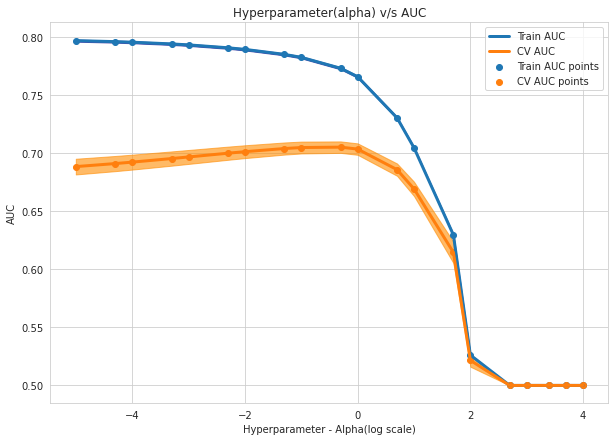

In [91]:
plt.figure(figsize=(10, 7))
plt.plot(log_alpha, train_auc, label = 'Train AUC', linewidth = 3)
plt.gca().fill_between(log_alpha, train_auc - train_auc_std, train_auc + train_auc_std, alpha = 0.6, color = 'darkblue')

plt.plot(log_alpha, cv_auc, label = 'CV AUC', linewidth = 3)
plt.gca().fill_between(log_alpha, cv_auc - cv_auc_std, cv_auc + cv_auc_std, alpha = 0.6, color='darkorange')

plt.scatter(log_alpha, train_auc, label = 'Train AUC points')
plt.scatter(log_alpha, cv_auc, label = 'CV AUC points')

plt.legend()
plt.grid(True)
plt.xlabel("Hyperparameter - Alpha(log scale)")
plt.ylabel("AUC")
plt.title("Hyperparameter(alpha) v/s AUC")
plt.show()

**Fitting the model with best hyperparameters**

In [92]:
mnb_bow_best = MultinomialNB(alpha = bestalpha_1, class_prior = [0.5, 0.5])
mnb_bow_best.fit(x_train_onehot_bow, y_train)

MultinomialNB(alpha=0.5, class_prior=[0.5, 0.5])

**Hyperparameter- AUC Plot**

In [95]:
y_train_pred = mnb_bow_best.predict_proba(x_train_onehot_bow)[:,1]
y_test_pred = mnb_bow_best.predict_proba(x_test_onehot_bow)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

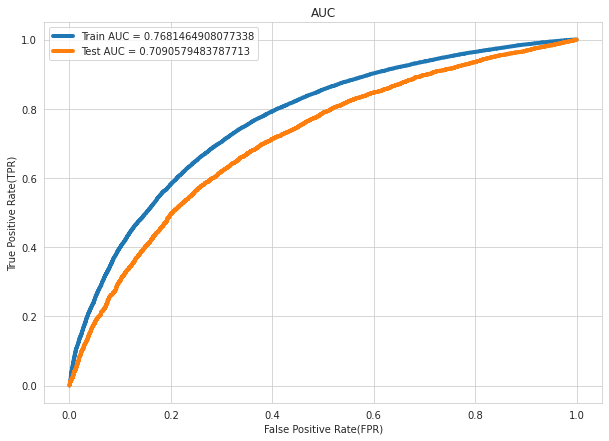

In [97]:
plt.figure(figsize=(10, 7))

auc_bow_train = auc(train_fpr, train_tpr)
auc_bow_test = auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label = "Train AUC = "+str(auc(train_fpr, train_tpr)), linewidth = 4)
plt.plot(test_fpr, test_tpr, label = "Test AUC = "+str(auc(test_fpr, test_tpr)), linewidth = 4)

plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(True)
plt.legend()
plt.show()

**Find best threshold using TPR, FPR**

In [110]:
def predict_best_labels(y_predicted, threshold, fpr, tpr):
    best_threshold = threshold[np.argmax(tpr*(1-fpr))]  # (tpr*(1-fpr)) will be maximum if fpr is low and tpr is high
    predictions = list()
    for y_hat in y_predicted:
        if y_hat >= best_threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

**Confusion Matrix**

[]

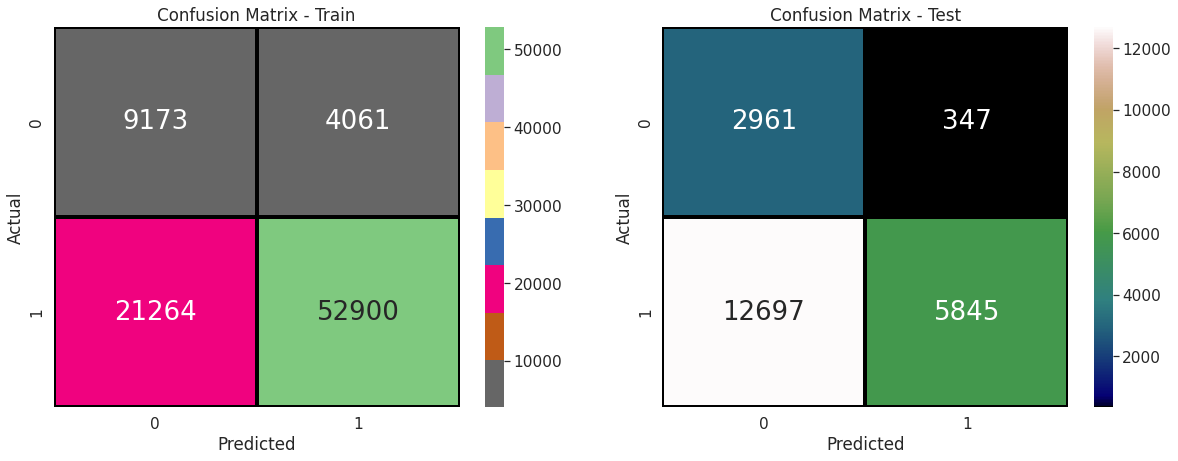

In [122]:
cm_train = np.matrix(confusion_matrix(y_train, predict_best_labels(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
cm_test = np.matrix(confusion_matrix(y_test, predict_best_labels(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

fig, ax = plt.subplots(1, 2, figsize=(20, 7))
sns.heatmap(cm_train, annot = True, annot_kws = {"size": 26}, fmt = 'g', cmap = "Accent_r", ax = ax[0], linewidths = 3, linecolor = 'black')
sns.heatmap(cm_test, annot = True, annot_kws = {"size": 26}, fmt = 'g', cmap = "gist_earth", ax = ax[1], linewidths = 3, linecolor = 'black')
ax[0].set_title('Confusion Matrix - Train')
ax[1].set_title('Confusion Matrix - Test')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.plot()

**Feature Importance -  Top 10 features:**

In [133]:
fea_bow = fea_vectorizer_essay_bow + fea_vectorizer_sub + fea_vectorizer_sub_sub + fea_vectorizer_state + fea_vectorizer_teacher + fea_vectorizer_grade + ["price", "teacher_number_of_previously_posted_projects"]

According to positive label:

In [130]:
bow_features_probs_pos = dict()
for feature_number in range(len(fea_bow)) :
    bow_features_probs_pos[feature_number] = mnb_bow_best.feature_log_prob_[1, feature_number]

final_bow_features_pos = pd.DataFrame({ 'feature_names' : fea_bow, 'feature_probability' : bow_features_probs_pos.values()})
top_10_features_pos = final_bow_features_pos.sort_values(by = ['feature_probability'], ascending = False)
top_10_features_pos.head(10)

,feature_names,feature_probability
13199,sugars,-3.045696
11985,secretly,-4.191009
9011,negotiable,-4.499153
7951,lifelong,-4.550111
2658,coffee,-4.579022
13728,thumbs,-4.807596
13767,timelines,-4.847616
9246,observations,-4.847873
7947,lieu,-4.891895
6561,holder,-4.921655


According to negative label:

In [132]:
bow_features_probs_neg = dict()
for feature_number in range(len(fea_bow)) :
    bow_features_probs_neg[feature_number] = mnb_bow_best.feature_log_prob_[0, feature_number]

final_bow_features_neg = pd.DataFrame({ 'feature_names' : fea_bow, 'feature_probability' : bow_features_probs_neg.values()})
top_10_features_neg = final_bow_features_neg.sort_values(by = ['feature_probability'], ascending = False)
top_10_features_neg.head(10)

,feature_names,feature_probability
13199,sugars,-3.058331
11985,secretly,-4.156007
7951,lifelong,-4.474694
9011,negotiable,-4.519116
2658,coffee,-4.622385
9246,observations,-4.821693
7947,lieu,-4.829115
13767,timelines,-4.859702
6561,holder,-4.870109
13728,thumbs,-4.874709


#Training model using TFIDF features(for text data)

**Stacking all the processed features using scipy sparse hstack, with essay as TFIDF featurized**

In [134]:
x_train_onehot_tfidf = hstack((x_train_categories_one_hot, x_train_sub_categories_one_hot, x_train_school_state_one_hot, x_train_teacher_prefix_one_hot, x_train_grade_category_one_hot, x_train_price_normalized, x_train_teacher_number_of_previously_posted_projects_normalized, x_train_essay_tfidf))
x_test_onehot_tfidf  = hstack((x_test_categories_one_hot, x_test_sub_categories_one_hot, x_test_school_state_one_hot, x_test_teacher_prefix_one_hot, x_test_grade_category_one_hot, x_test_price_normalized, x_test_teacher_number_of_previously_posted_projects_normalized, x_test_essay_tfidf))

print("Type -> One Hot -> x_train: ",type(x_train_onehot_tfidf))
print("Type -> One Hot -> x_test : ",type(x_test_onehot_tfidf))
print("\n")
print("Shape -> One Hot -> x_train: ",x_train_onehot_tfidf.shape)
print("Shape -> One Hot -> x_test : ",x_test_onehot_tfidf.shape)

Type -> One Hot -> x_train:  <class 'scipy.sparse.coo.coo_matrix'>
Type -> One Hot -> x_test :  <class 'scipy.sparse.coo.coo_matrix'>


Shape -> One Hot -> x_train:  (87398, 15316)
Shape -> One Hot -> x_test :  (21850, 15316)


**GridSearchCV - Train model to find best Hyperparameters**

In [135]:
mnb_bow = MultinomialNB(class_prior = [0.5, 0.5])
hyperparameter = {'alpha':[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 2500, 5000, 10000]}
clf = GridSearchCV(mnb_bow, hyperparameter, cv = 10, scoring = 'roc_auc', verbose = 1, return_train_score = True, n_jobs = -1)
clf.fit(x_train_onehot_tfidf, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


GridSearchCV(cv=10, estimator=MultinomialNB(class_prior=[0.5, 0.5]), n_jobs=-1,
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005,
                                   0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500,
                                   1000, 2500, 5000, 10000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

**GridSearchCV result:**

In [136]:
train_auc = clf.cv_results_['mean_train_score']
train_auc_std = clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std = clf.cv_results_['std_test_score']
bestalpha_2 = clf.best_params_['alpha']
bestScore_2 = clf.best_score_
print("BEST ALPHA value: ", clf.best_params_['alpha'])   #clf.best_estimator_.alpha
print("BEST AUC score: ", clf.best_score_)

BEST ALPHA value:  0.05
BEST AUC score:  0.6783041587816965


**Plotting Hyperparameter(log alpha) VS AUC**

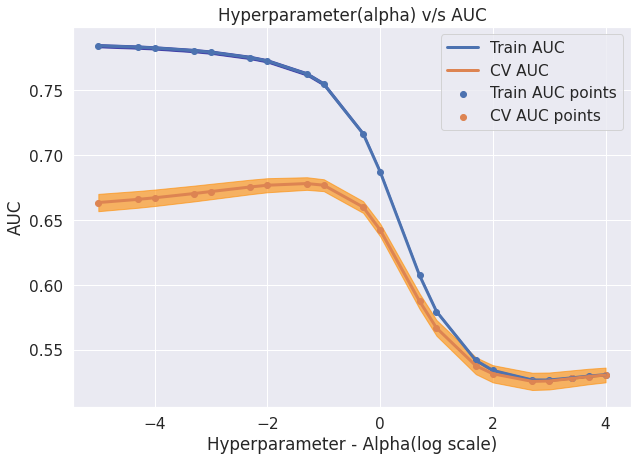

In [137]:
plt.figure(figsize=(10, 7))
plt.plot(log_alpha, train_auc, label = 'Train AUC', linewidth = 3)
plt.gca().fill_between(log_alpha, train_auc - train_auc_std, train_auc + train_auc_std, alpha = 0.6, color = 'darkblue')

plt.plot(log_alpha, cv_auc, label = 'CV AUC', linewidth = 3)
plt.gca().fill_between(log_alpha, cv_auc - cv_auc_std, cv_auc + cv_auc_std, alpha = 0.6, color='darkorange')

plt.scatter(log_alpha, train_auc, label = 'Train AUC points')
plt.scatter(log_alpha, cv_auc, label = 'CV AUC points')

plt.legend()
plt.grid(True)
plt.xlabel("Hyperparameter - Alpha(log scale)")
plt.ylabel("AUC")
plt.title("Hyperparameter(alpha) v/s AUC")
plt.show()

In [138]:
mnb_tfidf_best = MultinomialNB(alpha = bestalpha_2, class_prior = [0.5, 0.5])
mnb_tfidf_best.fit(x_train_onehot_bow, y_train)

MultinomialNB(alpha=0.05, class_prior=[0.5, 0.5])

**Hyperparameter- AUC Plot**

In [139]:
y_train_pred = mnb_tfidf_best.predict_proba(x_train_onehot_bow)[:, 1]
y_test_pred = mnb_tfidf_best.predict_proba(x_test_onehot_bow)[:, 1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

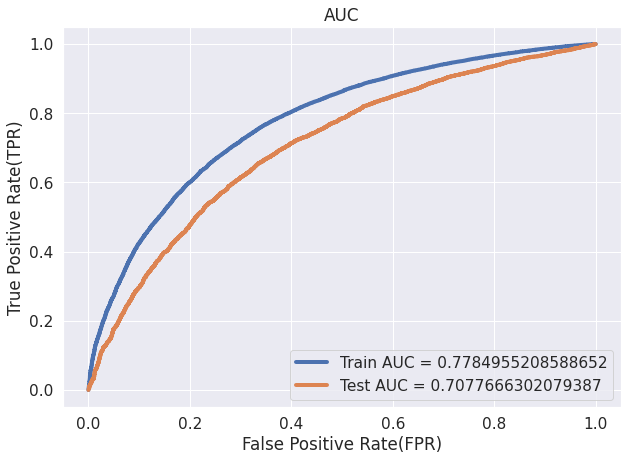

In [149]:
plt.figure(figsize=(10, 7))

auc_tfidf_train = auc(train_fpr, train_tpr)
auc_tfidf_test = auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label = "Train AUC = "+str(auc_tfidf_train), linewidth = 4)
plt.plot(test_fpr, test_tpr, label = "Test AUC = "+str(auc_tfidf_test), linewidth = 4)

plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(True)
plt.legend()
plt.show()

**Confusion Matrix**

[]

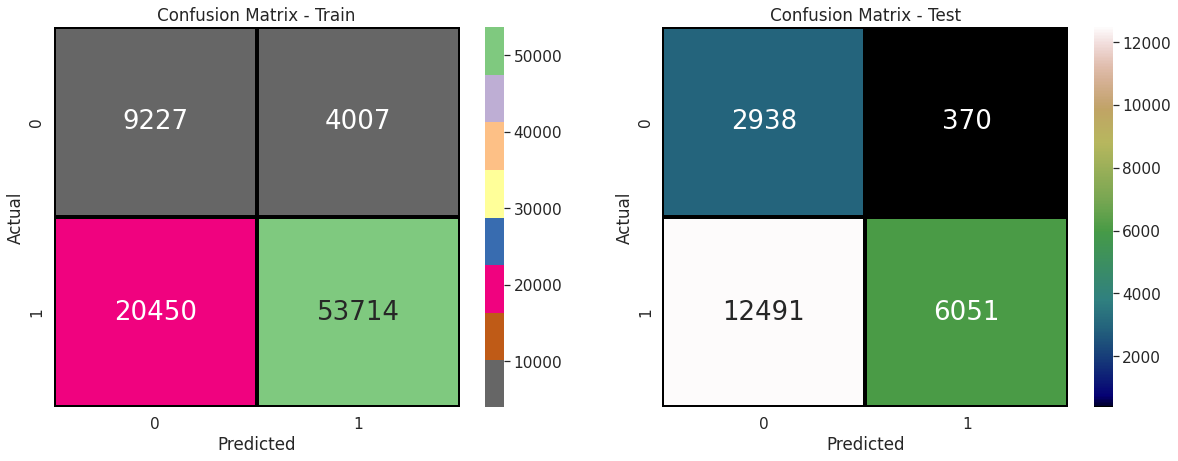

In [141]:
cm_train = np.matrix(confusion_matrix(y_train, predict_best_labels(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
cm_test = np.matrix(confusion_matrix(y_test, predict_best_labels(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

fig, ax = plt.subplots(1, 2, figsize=(20, 7))
sns.heatmap(cm_train, annot = True, annot_kws = {"size": 26}, fmt = 'g', cmap = "Accent_r", ax = ax[0], linewidths = 3, linecolor = 'black')
sns.heatmap(cm_test, annot = True, annot_kws = {"size": 26}, fmt = 'g', cmap = "gist_earth", ax = ax[1], linewidths = 3, linecolor = 'black')
ax[0].set_title('Confusion Matrix - Train')
ax[1].set_title('Confusion Matrix - Test')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.plot()

##Feature Importance - Top 10 features:

In [142]:
fea_tfidf = fea_vectorizer_essay_tfidf + fea_vectorizer_sub + fea_vectorizer_sub_sub + fea_vectorizer_state + fea_vectorizer_teacher + fea_vectorizer_grade + ["price", "teacher_number_of_previously_posted_projects"]

According to positive label:

In [147]:
tfidf_features_probs_pos = dict()
for feature_number in range(len(fea_tfidf)) :
    tfidf_features_probs_pos[feature_number] = mnb_tfidf_best.feature_log_prob_[1, feature_number]

final_tfidf_features_pos = pd.DataFrame({ 'feature_names' : fea_tfidf, 'feature_probability' : tfidf_features_probs_pos.values()})
top_10_features_pos = final_tfidf_features_pos.sort_values(by = ['feature_probability'], ascending = False)
top_10_features_pos.head(10)

,feature_names,feature_probability
13199,sugars,-3.045091
11985,secretly,-4.190407
9011,negotiable,-4.498552
7951,lifelong,-4.549510
2658,coffee,-4.578421
13728,thumbs,-4.806996
13767,timelines,-4.847016
9246,observations,-4.847273
7947,lieu,-4.891295
6561,holder,-4.921056


According to neagtive label:

In [148]:
tfidf_features_probs_neg = dict()
for feature_number in range(len(fea_tfidf)) :
    tfidf_features_probs_neg[feature_number] = mnb_tfidf_best.feature_log_prob_[0, feature_number]

final_tfidf_features_neg = pd.DataFrame({ 'feature_names' : fea_tfidf, 'feature_probability' : tfidf_features_probs_neg.values()})
top_10_features_neg = final_tfidf_features_neg.sort_values(by = ['feature_probability'], ascending = False)
top_10_features_neg.head(10)

,feature_names,feature_probability
13199,sugars,-3.054761
11985,secretly,-4.152446
7951,lifelong,-4.471139
9011,negotiable,-4.515562
2658,coffee,-4.618834
9246,observations,-4.818147
7947,lieu,-4.825569
13767,timelines,-4.856156
6561,holder,-4.866564
13728,thumbs,-4.871164


#Comparison of models

In [150]:
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyperparameter: Alpha", "Train AUC", "Test AUC"]

x.add_row(["BOW", "Multinomial Naive Bayes", bestalpha_1, round(auc_bow_train, 2), round(auc_bow_test, 2)])
x.add_row(["TF-IDF", "Multinomial Naive Bayes", bestalpha_2, round(auc_tfidf_train, 2),round(auc_tfidf_test, 2)])
print(x)

+------------+-------------------------+-----------------------+-----------+----------+
| Vectorizer |          Model          | Hyperparameter: Alpha | Train AUC | Test AUC |
+------------+-------------------------+-----------------------+-----------+----------+
|    BOW     | Multinomial Naive Bayes |          0.5          |    0.77   |   0.71   |
|   TF-IDF   | Multinomial Naive Bayes |          0.05         |    0.78   |   0.71   |
+------------+-------------------------+-----------------------+-----------+----------+
